In [ ]:
# This is a case of linear regression using insurance dataset. hence we are going to use linear regression technique over this dataset
#in order to predict insurance costs.

In [ ]:




from sklearn import metrics
import numpy as np
%matplotlib inline

In [5]:
#importing the dataset from github
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#lets do EDA

data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
#There are 1338 observations and no null values.
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#The mean age of persons here is around 39 years and have around 1 child.


/Users/paramikdasgupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


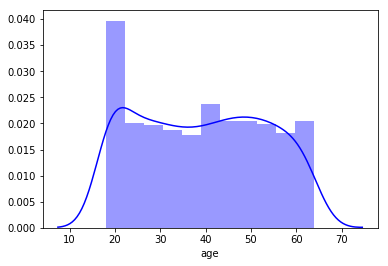

In [13]:
#Lets understand the distribution of features.
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(data['age'], color='b');

/Users/paramikdasgupta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


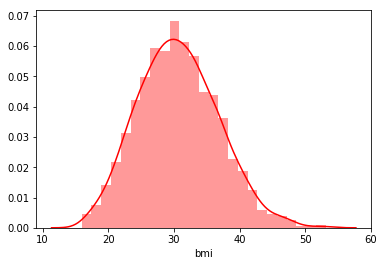

In [16]:
sns.distplot(data['bmi'], color='r');

In [ ]:
#bmi seems to have normal distribution. 

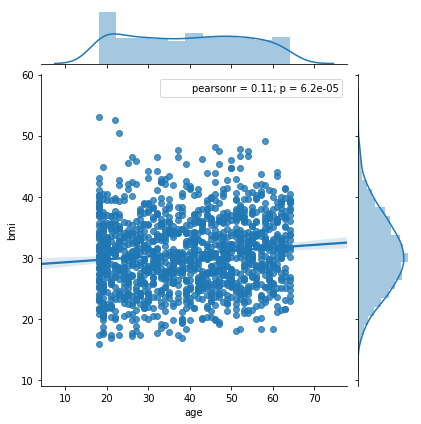

In [17]:
#Lets check if there is any relation between age and bmi rate.
import warnings
warnings.filterwarnings("ignore")
sns.jointplot("age","bmi", data=data, kind ='reg')

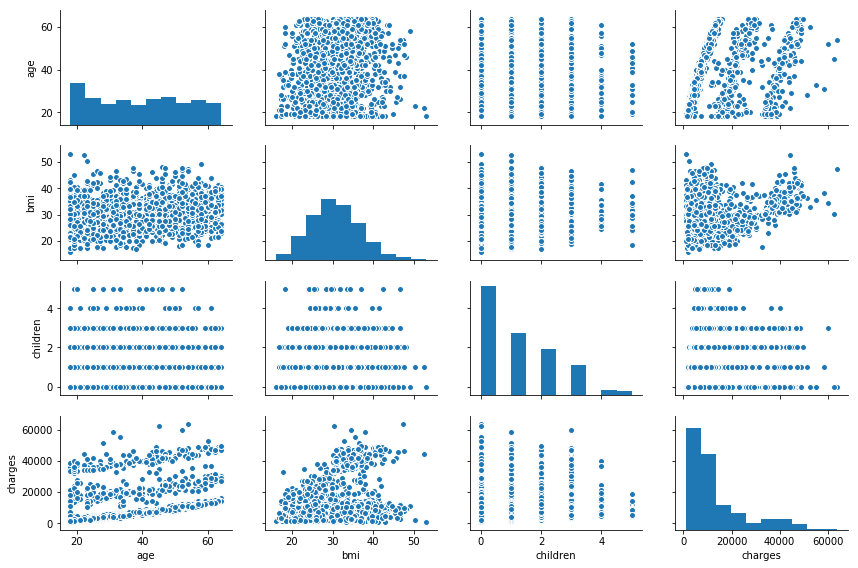

In [18]:
sns.pairplot(data, size = 2, aspect = 1.5)

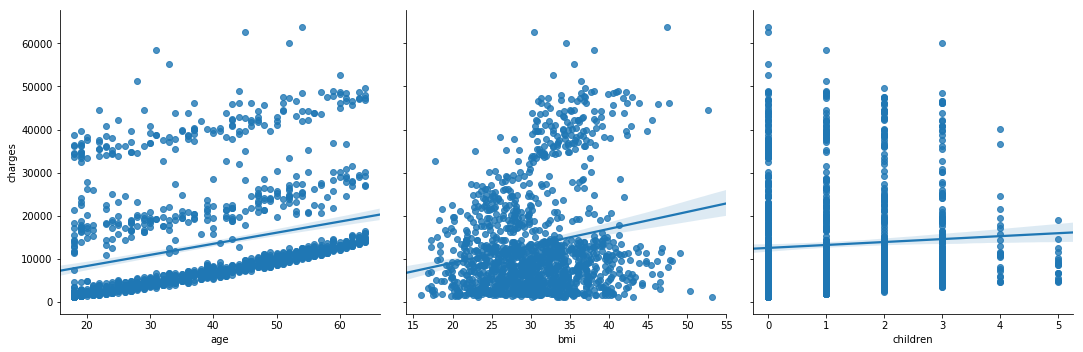

In [20]:
sns.pairplot(data,x_vars=['age','bmi','children'],y_vars='charges',size = 5,aspect =1, kind='reg');

In [21]:
#calculating and plotting heatmap correlation
data.corr();

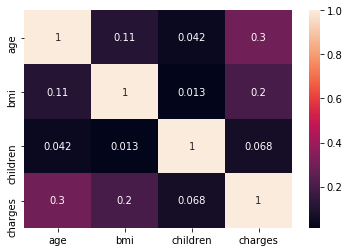

In [22]:
sns.heatmap(data.corr(),annot=True);

In [ ]:
#the diagonal on the above matrix shows auto-correlation of the variables. It is always 1. 
#The correlation between children and charges is the highest i.e 0.068
#correlations can vary from +1 to -1. Closer to +1 means strong positive correlation and close to -1
#means strong negative correlation. Closer to 0 means not very strongly correlated.
#variables with strong correlations are msotly probably candidates for model building.



In [ ]:
#Lets start with linear regression

In [4]:
data.head()

NameError: name 'data' is not defined

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [29]:
#feature engineering
#here we are just separating the features and the outcomes.
import pandas as pd
feature_names = ['age','bmi','children']
training_features = data[feature_names]
training_features

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
5,31,25.740,0
6,46,33.440,1
7,37,27.740,3
8,37,29.830,2
9,60,25.840,0


In [30]:
outcome_name = ['charges']
outcome_labels = data[outcome_name]
outcome_labels

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
6,8240.58960
7,7281.50560
8,6406.41070
9,28923.13692


In [31]:
#here we are separating the numerical features and the 
#categorical features. It will help us to perform scaling 
#and encoding on the data.
numeric_feature_names = ['age','bmi','children']

In [32]:
#scaling/normalization on numerical feature data
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # Z score
ss.fit(training_features[numeric_feature_names])
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])
print(training_features)

           age       bmi  children
0    -1.438764 -0.453320 -0.908614
1    -1.509965  0.509621 -0.078767
2    -0.797954  0.383307  1.580926
3    -0.441948 -1.305531 -0.908614
4    -0.513149 -0.292556 -0.908614
5    -0.584350 -0.807656 -0.908614
6     0.483668  0.455486 -0.078767
7    -0.157143 -0.479567  1.580926
8    -0.157143 -0.136714  0.751079
9     1.480485 -0.791252 -0.908614
10   -1.011557 -0.728915 -0.908614
11    1.622887 -0.717432 -0.908614
12   -1.153959  0.612969 -0.908614
13    1.195680  1.502090 -0.908614
14   -0.869155  1.881033 -0.908614
15   -1.438764 -0.994667 -0.078767
16    0.910875  0.019128 -0.078767
17   -1.153959 -1.118520 -0.908614
18    1.195680  1.580832 -0.908614
19   -0.655551  0.760609 -0.908614
20    1.480485  0.876261 -0.908614
21   -0.655551  0.284880 -0.078767
22   -1.509965  0.563756 -0.908614
23   -0.370746  0.206139 -0.078767
24   -0.157143 -0.432814  0.751079
25    1.409283 -0.482848  1.580926
26    1.694088 -1.243194 -0.908614
27    1.124479  0.34

/Users/paramikdasgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/paramikdasgupta/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
#one hot encoding
#training_features = pd.get_dummies(training_features,columns=categorical_feature_names )
#print(training_features)

           age       bmi  children  smoker_no  smoker_yes
0    -1.438764 -0.453320 -0.908614          0           1
1    -1.509965  0.509621 -0.078767          1           0
2    -0.797954  0.383307  1.580926          1           0
3    -0.441948 -1.305531 -0.908614          1           0
4    -0.513149 -0.292556 -0.908614          1           0
5    -0.584350 -0.807656 -0.908614          1           0
6     0.483668  0.455486 -0.078767          1           0
7    -0.157143 -0.479567  1.580926          1           0
8    -0.157143 -0.136714  0.751079          1           0
9     1.480485 -0.791252 -0.908614          1           0
10   -1.011557 -0.728915 -0.908614          1           0
11    1.622887 -0.717432 -0.908614          0           1
12   -1.153959  0.612969 -0.908614          1           0
13    1.195680  1.502090 -0.908614          1           0
14   -0.869155  1.881033 -0.908614          0           1
15   -1.438764 -0.994667 -0.078767          1           0
16    0.910875

In [33]:
#we need to now extract categorically engineered features
training_features.columns

Index(['age', 'bmi', 'children'], dtype='object')

In [34]:
data[numeric_feature_names].columns

Index(['age', 'bmi', 'children'], dtype='object')

In [21]:
#categorical_engineered_features = set(training_features.columns) - set(data[numeric_feature_names].columns)
#categorical_engineered_features = list(categorical_engineered_features)
#categorical_engineered_features

['smoker_yes', 'smoker_no']

In [35]:
#LETS SPLIT THE DATA IN TRAING AND TESTING PART
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(training_features,outcome_labels, test_size =0.2, random_state=0)

In [36]:
print('Train cases as below')
print('X_train shape: ', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('\nTest cases as below')
print('X_test shape:',X_test.shape)
print('Y_test shape:',Y_test.shape)

Train cases as below
X_train shape:  (1070, 3)
Y_train shape: (1070, 1)

Test cases as below
X_test shape: (268, 3)
Y_test shape: (268, 1)


In [40]:
X_train.head()
Y_train.head()

,charges
621,40182.24600
194,1137.46970
240,38511.62830
1168,4670.64000
1192,13019.16105


In [38]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
#interpreting model coefficients
print("Intercept:", regressor.intercept_)
print("Coeeficients:",regressor.coef_)

Intercept: [13217.57716913]
Coeeficients: [[3096.89098865 1817.49451055  795.59068261]]


In [52]:
#Using the model for prediction
Y_pred_test = regressor.predict(X_test)

Y_pred_train = regressor.predict(X_train)



In [53]:
#Model evaluation
#Lets start with MAE (Mean absolute error)
MAE_train = metrics.mean_absolute_error(Y_train,Y_pred_train)
MAE_test = metrics.mean_absolute_error(Y_test,Y_pred_test)




In [54]:
print('MAE for training set is {}' .format(MAE_train))
print('MAE for test set is {}' .format(MAE_test))



MAE for training set is 8977.736780682058
MAE for test set is 9016.002558195327


In [55]:
#lets calculate using MSE (Mean sqaured error)
MSE_train = metrics.mean_squared_error(Y_train,Y_pred_train)
MSE_test = metrics.mean_squared_error(Y_test,Y_pred_test)



In [56]:
print('MSE for training set is {}' .format(MSE_train))
print('MSE for test set is {}' .format(MSE_test))



MSE for training set is 128065760.88993324
MSE for test set is 133189853.20376825


In [57]:
#lets calculate using RMSE

RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))



In [58]:
print('RMSE for training set is {}' .format(RMSE_train))
print('RMSE for test set is {}' .format(RMSE_test))



RMSE for training set is 11316.614374004852
RMSE for test set is 11540.790839616158


In [59]:
#R sqaured metric
from sklearn.metrics import r2_score
r2_score_train = r2_score(Y_train, Y_pred_train)
r2_score_test = r2_score(Y_test, Y_pred_test)

In [60]:
r2_score_train

0.10672246886681236

In [68]:
r2_score_test

0.16301209866339939